In [13]:
import matplotlib.pyplot as plt
import networkx as nx
from time import sleep

In [81]:

w = [
    [0, 2, 4, 0, 0, 0, 0], # Пермь
    [2, 0, 9, 0, 1, 0, 0], # 
    [4, 9, 0, 7, 0, 0, 8],
    [0, 0, 7, 0, 8, 2, 0],
    [0, 1, 0, 8, 0, 1, 0],
    [0, 0, 0, 2, 1, 0, 4],
    [0, 0, 2, 0, 1, 0, 0]
]

n = len(w)

col = [i for i in range(n)]

G = nx.Graph()

G.clear()

G.add_nodes_from(col)

for i in range(n):
    for j in range(n):
        if w[i][j] >= 1:
            G.add_edge(i, j, weight=w[i][j])

G.edges()

EdgeView([(0, 1), (0, 2), (1, 2), (1, 4), (2, 3), (2, 6), (3, 4), (3, 5), (4, 5), (4, 6), (5, 6)])

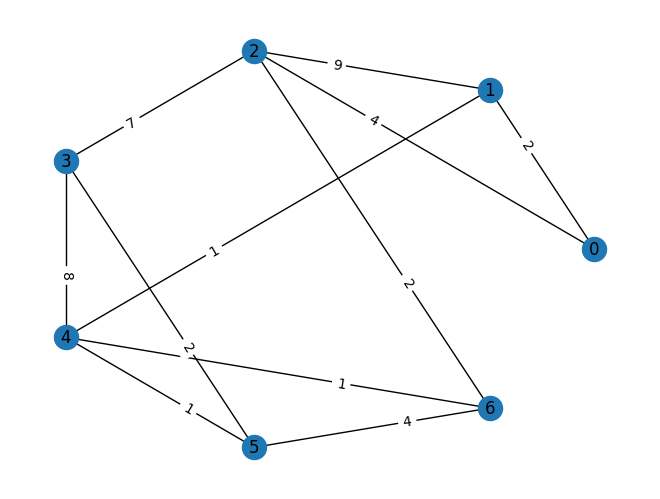

In [82]:
pos = nx.circular_layout(G)
labels = nx.get_edge_attributes(G, 'weight')
nx.draw(G, pos, with_labels=True)
nx.draw_networkx_edge_labels(G, pos, edge_labels=labels, label_pos=0.35)
plt.show()

(1, 4)


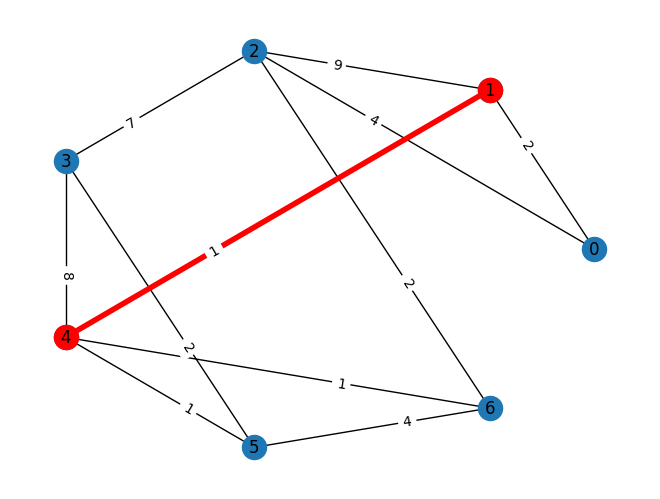

(4, 5)


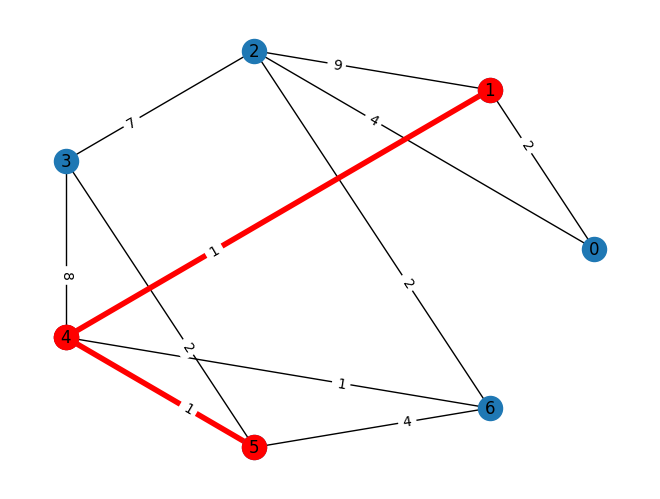

(1, 0)


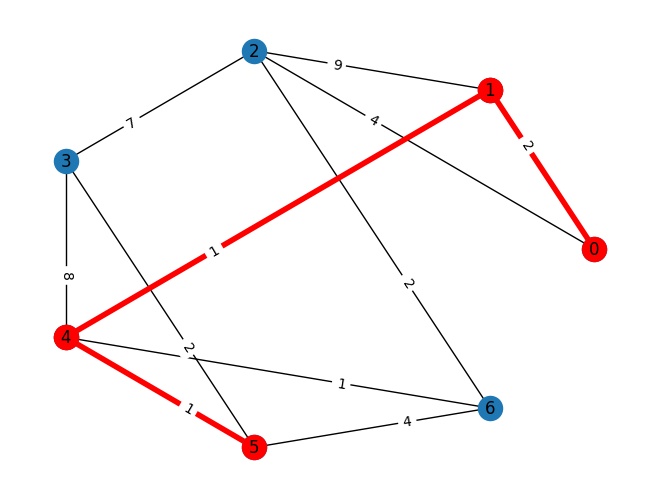

(3, 5)


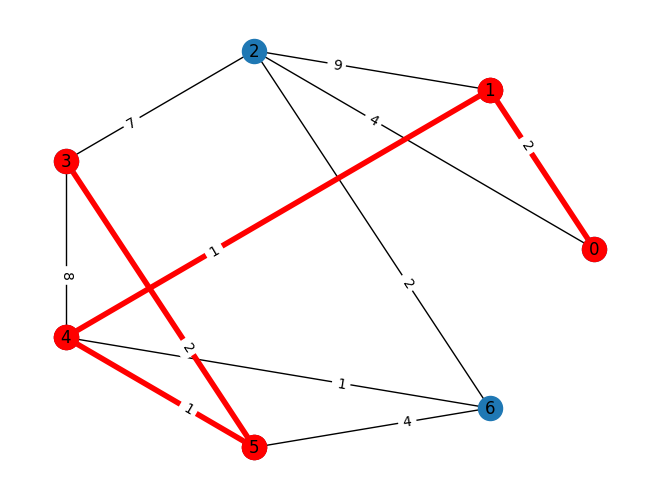

(6, 2)


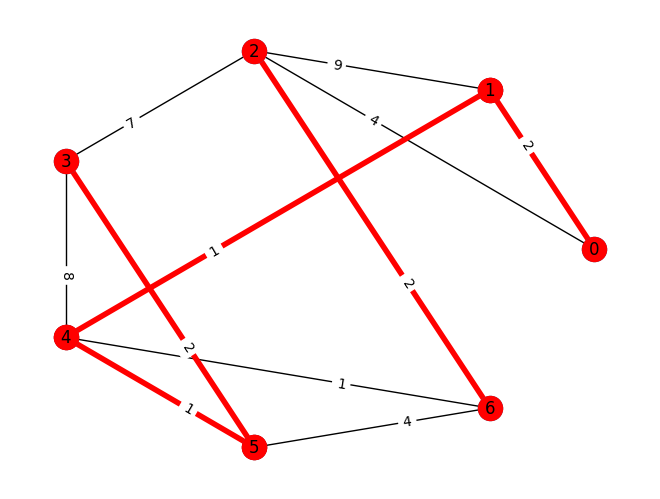

(0, 2)


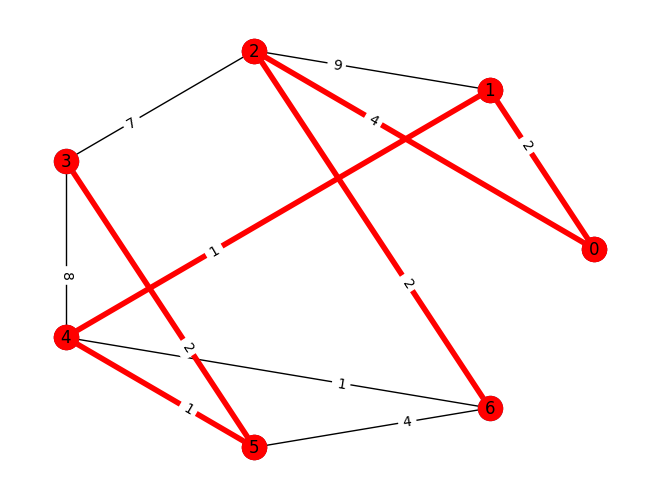

In [92]:
# За основу взят алгоритм закрашивания
# Заводим список для хранения ребер с минимальными весами
ostov = []
# Заводим список для хранения вершин которые уже использованы для исключения повтороного использования и обеспечения единого росчерка
used_nodes = []

col_copy = col.copy()

for k in range(n-1):
    minweight = 1e10
    for i in range(n):
        for j in range(n):
            if j not in used_nodes and col_copy[i] != col_copy[j] and 0 < w[i][j] < minweight:
                iMin = i
                jMin = j
                minweight = w[i][j]
    # print(iMin, jMin, minweight, col_copy)
    ostov.append((iMin, jMin))
    used_nodes.extend([iMin])
    c = col_copy[jMin]
    
    for i in range(n):
        if col_copy[i] == c:
            col_copy[i] = col_copy[iMin]

# print(ostov)

nodes = []
edges = []

for i in ostov:
    print(i,)
    nodes.extend(list(i))
    edges.append(i)
    # sleep(1000)
    nx.set_node_attributes(G, {i: 'red'}, name='color')
    nx.draw(G, pos, with_labels=True)
    nx.draw_networkx_nodes(G, pos, nodelist=nodes, node_color='r')
    nx.draw_networkx_edges(G, pos, edge_color='r',width=4, edgelist=edges)
    nx.draw_networkx_edge_labels(G, pos, edge_labels=labels, label_pos=0.35)
    plt.show()

# print(ostov)

In [23]:
# pos = nx.circular_layout(G)
# # options = {"edgecolors": "tab:gray", "node_size": 800, "alpha": 0.9}
# nx.draw(G, pos, with_labels=True)
# # nx.draw_networkx_nodes(O, pos, nodelist=nodes_r, node_color='r', **options)
# # nx.draw_networkx_nodes(O, pos, node_color='r', **options)
# # nx.draw_networkx_edges(O, pos, edge_color='r', edgelist=ostov)
# # nx.draw_networkx_edges(O, pos, edge_color='b', edgelist=non_ostov)
# # nx.draw_networkx_edge_labels(O, pos, edge_labels=labels, label_pos=0.35)
# plt.show()